## Imports

In [1]:
import sys
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import requests
import os
import csv
import re
import string
import pandas as pd
import numpy as np
import random
import time
import nltk
from textblob import TextBlob
from nltk.corpus import PlaintextCorpusReader
from datetime import datetime
from datetime import timedelta
from pathlib import Path
from collections import Counter
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
#Folder de trabajo
data_folder = Path("C:/Users/Jeffri/Desktop/Trabajo ISC ILN/")


## Agentes

In [2]:
USER_AGENTS = [
    'Mozilla/5.0 (Windows; U; Windows NT 5.1; it; rv:1.8.1.11) Gecko/20071127 Firefox/2.0.0.11',
    'Mozilla/5.0 (iPad; CPU OS 8_4_1 like Mac OS X) AppleWebKit/600.1.4 (KHTML, like Gecko) Version/8.0 Mobile/12H321 Safari/600.1.4',
    'Mozilla/4.0 (compatible; MSIE 6.0; Windows NT 5.1; SV1; .NET CLR 1.1.4322; .NET CLR 2.0.50727)',
    'Mozilla/5.0 (compatible; Konqueror/3.5; Linux) KHTML/3.5.5 (like Gecko) (Kubuntu)',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/51.0.2704.79 Safari/537.36 Edge/14.14393'
    'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.7; rv:11.0) Gecko/20100101 Firefox/11.0',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:53.0) Gecko/20100101 Firefox/53.0',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36',
    'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/71.0.3578.98 Safari/537.36 OPR/58.0.3135.107']

## Carpetas

In [3]:
!mkdir datos


Ya existe el subdirectorio o el archivo datos.


## Proceso Extraccion de Noticias

In [22]:
#Definicion de fecha
dt = datetime(2018,12,1)
a = 31
i = 0
urls = []
nameNoticias = []
fechas = []
mes =  []
horadePublicacion = []
lugar = []
contenidoNoticias = []
tipoNoticias = []

eluniverso = "https://www.eluniverso.com/"


# Obtener links de 1 año de noticias
while i < a: 
  fecha = dt + timedelta(days=i)
  i +=1
  print (fecha)
  url = "https://www.eluniverso.com/servicios/archivo/{}/{}/{}".format(fecha.year,fecha.month,fecha.day)

  user_agent=True
  time.sleep(random.randint(1,5))
  if user_agent:
    result = requests.get(url,headers={'User-Agent': random.choice(USER_AGENTS)})


  src = result.content
  soup = BeautifulSoup(src,'lxml')
  
  field_content = soup.find_all('span',{'class':'field-content'})  
  for linksnoticias in field_content:
      links= linksnoticias.find("a")
  #for link in links:
      if "noticias/2018" in links.attrs['href']:
         urls.append(eluniverso + links.attrs['href'])
         nameNoticias.append(links.text)
         fechas.append(fecha)
         mes.append(fecha.month)
         urlcontenido = eluniverso + links.attrs['href']
#          timenews = linksnoticias.find('span',{'class':'time'})
#          horadePublicacion.append(timenews.text)
   
for linkcontenido in urls:
    print('Procesando Links')
    time.sleep(random.randint(1,6))
    result = requests.get(linkcontenido,headers={'User-Agent': random.choice(USER_AGENTS)})
    source = result.content
    soup = BeautifulSoup(source,"lxml")
    contenido = soup.find_all("div",{"class":"panel-col-first panel-panel"})

    for inside in contenido :
        print('Procesando Noticias')
#         #Extraemos lugar de la noticia
#         location = inside.find('div',{'class':'location-event'})
#         if location != None:
#             name=location.text.replace('-','').replace('\n','')
#             lugar.append(name)
        #Extramos el contenido de la noticia
        parrafo = inside.find('div',{'class':'field-name-body'})
        if parrafo != None:
            noticia = ""
            for p in parrafo.find_all("p"):
                noticia = noticia + p.text
            contenidoNoticias.append(noticia.replace('\n',''))
        # Tipo de la noticia Internacional / Economia
        tipo = inside.find('div',{'class':'views-field views-field-field-seccion-principal'})
        if tipo != None:
            for nombretipo in tipo.find("a"):
                tipoNoticias.append(nombretipo)

print(len(contenidoNoticias))
print(len(tipoNoticias))
#               
print('Creando el DataFrame')
data = {'Fecha':fechas,'Mes':mes, 'Noticia': nameNoticias, 'Url':urls,'Contenido': contenidoNoticias,'Tipo':tipoNoticias}
df = pd.DataFrame(data)

csvmake(df,'MesDiciembre')

2018-12-01 00:00:00
2018-12-02 00:00:00
2018-12-03 00:00:00
2018-12-04 00:00:00
2018-12-05 00:00:00
2018-12-06 00:00:00
2018-12-07 00:00:00
2018-12-08 00:00:00
2018-12-09 00:00:00
2018-12-10 00:00:00
2018-12-11 00:00:00
2018-12-12 00:00:00
2018-12-13 00:00:00
2018-12-14 00:00:00
2018-12-15 00:00:00
2018-12-16 00:00:00
2018-12-17 00:00:00
2018-12-18 00:00:00
2018-12-19 00:00:00
2018-12-20 00:00:00
2018-12-21 00:00:00
2018-12-22 00:00:00
2018-12-23 00:00:00
2018-12-24 00:00:00
2018-12-25 00:00:00
2018-12-26 00:00:00
2018-12-27 00:00:00
2018-12-28 00:00:00
2018-12-29 00:00:00
2018-12-30 00:00:00
2018-12-31 00:00:00
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando

Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
P

Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
P

Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
P

Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
P

Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
Procesando Noticias
Procesando Links
P

ValueError: arrays must all be same length

In [25]:
print(len(contenidoNoticias))
print(len(tipoNoticias))
print(len(mes))
print(len(fechas))
print(len(nameNoticias))
print(len(urls))

data = {'Fecha':fechas,'Mes':mes, 'Noticia': nameNoticias, 'Url':urls,'Contenido': contenidoNoticias,'Tipo':tipoNoticias}
df = pd.DataFrame(data)
csvmake(df,'MesDiciembre')

1291
1291
1291
1291
1291
1291


# Crear CSV

In [4]:
#Funcion para crear csv a partir del dataframe
def csvmake(data, name):
    file_path = '{}/{}.csv'.format(data_folder, name)
    data.to_csv(file_path, sep=',', encoding='utf-8', index=False)

## Leer csv y mostrarlo en un dataframe: Filtrar por tipo de noticias.

In [3]:
import os
import glob

path =r'C:/Users/Jeffri/Desktop/Trabajo ISC ILN/datos' # use your path
allFiles = glob.glob(path + "/*.csv")
frame = pd.DataFrame()
list_ = []
for file_ in allFiles:
    df = pd.read_csv(file_,index_col=None, header=0)
    list_.append(df)
frame = pd.concat(list_)

frame

,Fecha,Mes,Noticia,Url,Contenido,Tipo
0,2018-01-01,1,AP y oposición admiten ausencia de agenda legi...,https://www.eluniverso.com//noticias/2018/01/0...,El balance de la gestión de siete meses de la ...,Política
1,2018-01-01,1,Consejo de Participación Ciudadana no aprueba ...,https://www.eluniverso.com//noticias/2018/01/0...,Tras cuatro meses de recibir aportes ciudadano...,Política
2,2018-01-01,1,Por la consulta surgen grupos afines a Lenín M...,https://www.eluniverso.com//noticias/2018/01/0...,"“Votaremos por Lenín siete veces sí”, “qué dic...",Política
3,2018-01-01,1,En proyección de gastos personales se podrá in...,https://www.eluniverso.com//noticias/2018/01/0...,Desde el 2018 las personas naturales también p...,Economía
4,2018-01-01,1,Acuerdo favoreció aumento de las exportaciones...,https://www.eluniverso.com//noticias/2018/01/0...,Como un año positivo catalogan los exportadore...,Economía
5,2018-01-01,1,Frío histórico se extiende por Estados Unidos ...,https://www.eluniverso.com//noticias/2018/01/0...,Un frío ártico que rompió los récord de bajas ...,Internacional
6,2018-01-01,1,Ataques aéreos matan a 23 personas en Yemen,https://www.eluniverso.com//noticias/2018/01/0...,Presuntos ataques aéreos de la coalición lider...,Internacional
7,2018-01-01,1,Nueve muertos durante disturbios en cárcel de ...,https://www.eluniverso.com//noticias/2018/01/0...,Un motín registrado este lunes en una cárcel d...,Internacional
8,2018-01-01,1,¿Qué tan frío está en Canadá?,https://www.eluniverso.com//noticias/2018/01/0...,¿Qué tan frío está en Canadá? Habría que pregu...,Internacional
9,2018-01-01,1,Incendio destruye cientos de autos y derrite s...,https://www.eluniverso.com//noticias/2018/01/0...,Cientos de autos fueron reducidos a carrocería...,Internacional


In [145]:
# dataPolitica = frame[['Mes','Contenido']][frame['Tipo']=='Política']
dataPolitica = frame[['Mes','Contenido']]
dataPolitica = dataPolitica.reset_index(drop=True)
dataPolitica

,Mes,Contenido
0,1,"El balance de la gestión de siete meses de la Asamblea no es positivo, según la valoración de los propios legisladores.Tanto la oposición como el ..."
1,1,"Tras cuatro meses de recibir aportes ciudadanos, los vocales del Consejo de Participación Ciudadana (CPC) tienen listo un proyecto de reglamento p..."
2,1,"“Votaremos por Lenín siete veces sí”, “qué dice la gente, te apoyamos presidente”, “la verdadera revolución no acepta la corrupción”, repetía desd..."
3,1,"Desde el 2018 las personas naturales también podrán incluir como deducción en su proyección de gastos personales, los pagos que hagan sus padres p..."
4,1,"Como un año positivo catalogan los exportadores y empresarios ecuatorianos al 2017, el primer año en vigencia del acuerdo comercial con la Unión E..."
5,1,"Un frío ártico que rompió los récord de bajas temperaturas de Estados Unidos llegó incluso al estado de Florida este lunes, con advertencias climá..."
6,1,"Presuntos ataques aéreos de la coalición liderada por Arabia Saudí en Yemen mataron este lunes a 23 personas en la ciudad portuaria de Hodeida, in..."
7,1,"Un motín registrado este lunes en una cárcel del estado brasileño de Goias provocó la muerte de al menos nueve personas y lesiones a otras 14, inf..."
8,1,¿Qué tan frío está en Canadá? Habría que preguntarle a los pingüinos del zoológico de Calgary: incluso ellos tuvieron que buscar refugio.Los pingü...
9,1,Cientos de autos fueron reducidos a carrocerías quemadas en un dramático incendio en vísperas de Año Nuevo que alcanzó a varios pisos en un estaci...


In [147]:
meses =['1','2','3','4','5','6','7','8','9','10','11','12']
post_por_meses = []
for i, c in enumerate(meses):
    cad=""
    conteo = 0
    z = i+1
    with open("meses/" + c + ".txt", "wb") as file:
        for h , texto in enumerate(dataPolitica['Contenido']):
            if z == dataPolitica['Mes'][h]:
                cad=cad + str(texto)
                conteo +=1
        pickle.dump(cad, file)
        post_por_meses.append(conteo)
# Posteo por meses para el analisis lexico.
post_por_meses

[1501, 1259, 1381, 1322, 1329, 1271, 1010, 1161, 1344, 1455, 1550, 1291]

In [148]:
data = {}
for i, c in enumerate(meses):
    with open("meses/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [150]:
# Combinamos los datos
datos_combinados = {key: [value] for (key, value) in data.items()}

In [151]:
# DataFrame Combinado por meses
pd.set_option('max_colwidth',150)
data_politica_agrupada = pd.DataFrame.from_dict(datos_combinados).transpose()
data_politica_agrupada.columns = ['transcript']
data_politica_agrupada

,transcript
1,"El balance de la gestión de siete meses de la Asamblea no es positivo, según la valoración de los propios legisladores.Tanto la oposición como el ..."
2,"La Ley Seca, que es la prohibición de venta y consumo de bebidas alcohólicas en el Ecuador por el proceso electoral de Consulta Popular y Referénd..."
3,"El audio revelado por el Fiscal General, sobre un diálogo entre el excontralor Carlos Pólit y el presidente de la Asamblea José Serrano, motivó a ..."
4,Un camión que transportaba cerca de 90 cilindros de gas habría perdido el control en la bajada del cerro Santa Ana y se impactó contra el cerramie...
5,"El presidente del Consejo de Participación Ciudadana y Control Social (CPCCS) transitorio, Julio César Trujillo, indicó este martes que en los pró..."
6,"Acompañado por el ministro del Interior, Mauro Toscanini, y el alto mando militar y policial, el ministro de Defensa, Oswaldo Jarrín, encabezó un ..."
7,"El Frente Nacional del Magisterio por el Cambio anuncia un plantón el 9 de este mes en La Plaza Grande en Quito, para exigir al presidente de la R..."
8,"Tras casi cinco horas, desde las 08:15 de ayer, la audiencia de sustentación de apelación de Carolina Astudillo Santos, exsecretaria del estudio j..."
9,Tres aspirantes para terciar por la candidatura a la Prefectura del Guayas presentó hoy el movimiento Unidad Popular (UP) durante su Consejo Provi...
10,"El Tribunal Contencioso Electoral (TCE) alertó al Consejo de Participación Ciudadana y Control Social (CPC) de transición el ""peligro que represen..."


In [152]:
nombre_meses = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
data_politica_agrupada['Name'] = nombre_meses
data_politica_agrupada
data_politica_agrupada.to_pickle("corpus.pkl")

## Limpieza de los datos

In [153]:
# Primera limpieza de los datos, texto en minusculas, signos de puntuacion y palabras con numeros.
def limpieza_una(text):
    text = text.lower()
    text = re.sub('\[.*?¿\]\%', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…«»]', '', text)
    text = re.sub('\n', ' ', text)
    return text
primera_limpieza = lambda x: limpieza_una(x)

In [154]:
data_limpia_1 = pd.DataFrame(data_politica_agrupada.transcript.apply(primera_limpieza))
data_limpia_1
data_limpia_1.transcript[0:255]

1     el balance de la gestión de siete meses de la asamblea no es positivo  según la valoración de los propios legisladores tanto la oposición como el ...
2     la ley seca  que es la prohibición de venta y consumo de bebidas alcohólicas en el ecuador por el proceso electoral de consulta popular y referénd...
3     el audio revelado por el fiscal general  sobre un diálogo entre el excontralor carlos pólit y el presidente de la asamblea josé serrano  motivó a ...
4     un camión que transportaba cerca de  cilindros de gas habría perdido el control en la bajada del cerro santa ana y se impactó contra el cerramient...
5     el presidente del consejo de participación ciudadana y control social  cpccs  transitorio  julio césar trujillo  indicó este martes que en los pró...
6     acompañado por el ministro del interior  mauro toscanini  y el alto mando militar y policial  el ministro de defensa  oswaldo jarrín  encabezó un ...
7     el frente nacional del magisterio por el cambio anuncia un

# Vectorizar la información

In [156]:
# Diccionario con stopwords
import re
from nltk.corpus import stopwords
with open('stop-espanol1.txt') as f:
    lines = f.read().splitlines()

vector = CountVectorizer(stop_words=lines)
data_vector = vector.fit_transform(data_limpia_1.transcript)
data_matriz = pd.DataFrame(data_vector.toarray(), columns=vector.get_feature_names())
data_matriz.index = data_limpia_1.index
data_matriz.to_pickle("data-matriz.pkl")
data_matriz

,aa,aaa,aae,aai,aak,aakre,aal,aamaq,aamblea,aambleísta,...,спокойно,чтобы,スレッド投稿がうまく行かずバラバラに出し,ラサのジョカン寺が火災にあったらしい,以上です,動画を見るとかなりの燃え方だ,失礼しました,小惑星探査機,日本時間,蔵前仁一
1,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,1
3,10,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,16,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1,0,4,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2,0,0,0,1,0,3,0,0,0,...,1,1,1,0,1,0,1,1,1,0
10,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
# Guardamos el dataframe
data_limpia_1.to_pickle('datos_limpios.pkl')
pickle.dump(vector, open("cv.pkl", "wb"))

# Analisis 

In [158]:
# Cargamos los datos del dataframe en matriz.
data_analisis = pd.read_pickle('data-matriz.pkl')
data_analisis = data_analisis.transpose()
data_analisis.head()

,1,2,3,4,5,6,7,8,9,10,11,12
aa,2,5,10,16,2,1,0,7,2,2,1,5
aaa,0,1,0,1,0,0,0,0,0,0,2,0
aae,0,0,0,0,0,4,0,0,0,0,0,0
aai,0,0,0,0,0,0,0,0,0,0,2,0
aak,0,0,0,0,0,0,0,0,1,0,0,0


# WordCloud 

In [159]:
data_limpia = pd.read_pickle('datos_limpios.pkl')
with open('stop-espanol1.txt') as f:
    stop_words = f.read().splitlines()

vector_1 = CountVectorizer(stop_words=stop_words)
data_vector_1 = vector_1.fit_transform(data_limpia.transcript)
data_politica_2 = pd.DataFrame(data_vector_1.toarray(), columns=vector_1.get_feature_names())
data_politica_2.index = data_limpia.index

pickle.dump(vector_1, open("cv_stop.pkl", "wb"))
data_politica_2.to_pickle("datos_politica_stop.pkl")

wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)

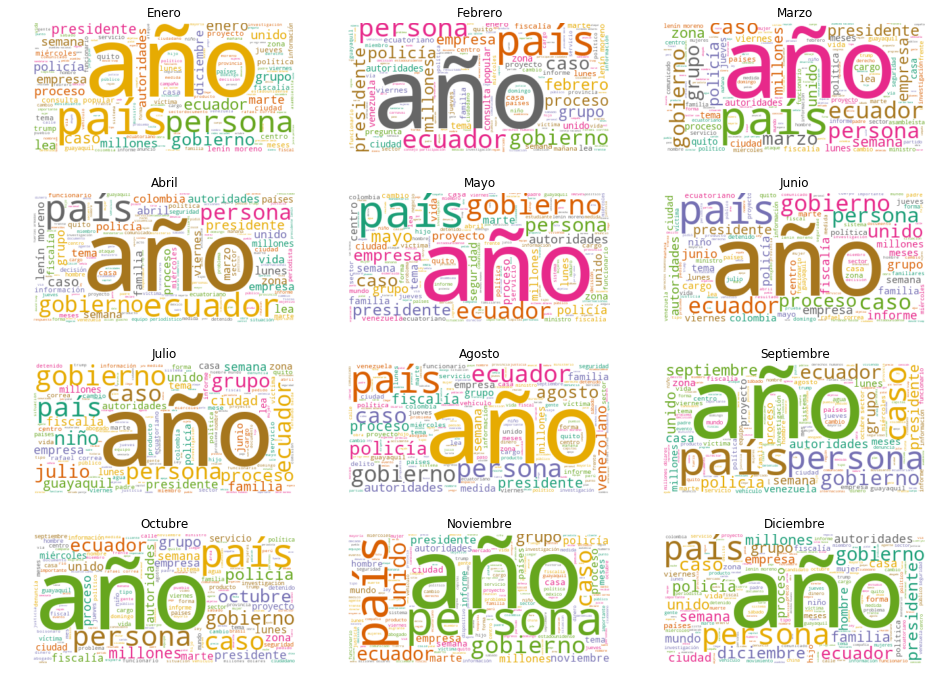

In [160]:
plt.rcParams['figure.figsize'] = [16,12]

meses = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
for index, mes in enumerate(data_analisis.columns):
    wc.generate(data_limpia.transcript[mes])
    plt.subplot(4, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(meses[index])
    
plt.show()

# Analisis  Lexico

In [161]:
palabras_unicas = []
for mes in data_analisis.columns:
    unicas = data_analisis[mes].nonzero()[0].size
    palabras_unicas.append(unicas)
meses = ['Enero','Febrero','Marzo','Abril','Mayo','Junio','Julio','Agosto','Septiembre','Octubre','Noviembre','Diciembre']
dataframe_palabras = pd.DataFrame(list(zip(meses, palabras_unicas)), columns=['mes', 'palabras_unicas'])

# Palabras por mes
palabras_por_mes = []
for mes in data_analisis.columns:
    ppm = sum(data_analisis[mes])
    palabras_por_mes.append(ppm)
dataframe_palabras['total_de_palabras'] = palabras_por_mes
dataframe_palabras['publicaciones_por_mes'] = post_por_meses
dataframe_palabras['palabras_por_publicacion'] = dataframe_palabras['total_de_palabras'] / dataframe_palabras['publicaciones_por_mes']
dataframe_palabras

,mes,palabras_unicas,total_de_palabras,publicaciones_por_mes,palabras_por_publicacion
0,Enero,30752,223132,1501,148.655563
1,Febrero,28386,189842,1259,150.787927
2,Marzo,30289,212487,1381,153.864591
3,Abril,28715,204019,1322,154.326021
4,Mayo,30233,207271,1329,155.960120
5,Junio,29090,196314,1271,154.456334
6,Julio,27222,161337,1010,159.739604
7,Agosto,27724,178601,1161,153.833764
8,Septiembre,31151,213866,1344,159.126488
9,Octubre,32701,225553,1455,155.019244


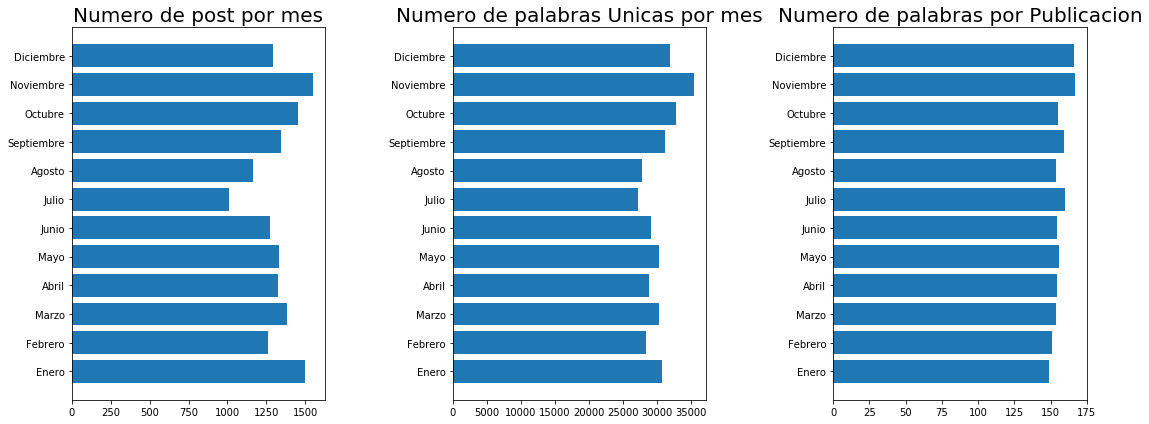

In [162]:
plt.rcParams['figure.figsize'] = [16, 6]

y_pos = np.arange(len(dataframe_palabras))

plt.subplot(1, 3, 1)
plt.barh(y_pos,post_por_meses, align='center')
plt.yticks(y_pos, meses)
plt.title('Numero de post por mes', fontsize=20)


plt.subplot(1, 3, 2)
plt.barh(y_pos, dataframe_palabras.palabras_unicas, align='center')
plt.yticks(y_pos, dataframe_palabras.mes)
plt.title('Numero de palabras Unicas por mes', fontsize=20)

plt.subplot(1, 3, 3)
plt.barh(y_pos, dataframe_palabras.palabras_por_publicacion, align='center')
plt.yticks(y_pos, dataframe_palabras.mes)
plt.title('Numero de palabras por Publicacion', fontsize=20)

plt.tight_layout()
plt.show()

# Analisis de sentimientos

In [163]:
datos_sentimientos = pd.read_pickle('corpus.pkl')
datos_sentimientos

,transcript,Name
1,"El balance de la gestión de siete meses de la Asamblea no es positivo, según la valoración de los propios legisladores.Tanto la oposición como el ...",Enero
2,"La Ley Seca, que es la prohibición de venta y consumo de bebidas alcohólicas en el Ecuador por el proceso electoral de Consulta Popular y Referénd...",Febrero
3,"El audio revelado por el Fiscal General, sobre un diálogo entre el excontralor Carlos Pólit y el presidente de la Asamblea José Serrano, motivó a ...",Marzo
4,Un camión que transportaba cerca de 90 cilindros de gas habría perdido el control en la bajada del cerro Santa Ana y se impactó contra el cerramie...,Abril
5,"El presidente del Consejo de Participación Ciudadana y Control Social (CPCCS) transitorio, Julio César Trujillo, indicó este martes que en los pró...",Mayo
6,"Acompañado por el ministro del Interior, Mauro Toscanini, y el alto mando militar y policial, el ministro de Defensa, Oswaldo Jarrín, encabezó un ...",Junio
7,"El Frente Nacional del Magisterio por el Cambio anuncia un plantón el 9 de este mes en La Plaza Grande en Quito, para exigir al presidente de la R...",Julio
8,"Tras casi cinco horas, desde las 08:15 de ayer, la audiencia de sustentación de apelación de Carolina Astudillo Santos, exsecretaria del estudio j...",Agosto
9,Tres aspirantes para terciar por la candidatura a la Prefectura del Guayas presentó hoy el movimiento Unidad Popular (UP) durante su Consejo Provi...,Septiembre
10,"El Tribunal Contencioso Electoral (TCE) alertó al Consejo de Participación Ciudadana y Control Social (CPC) de transición el ""peligro que represen...",Octubre


In [164]:
from textblob import TextBlob

from textblob import TextBlob
    
pol = lambda x: TextBlob(x).sentiment.polarity
pol2 = lambda x: x.sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity
sub2 = lambda x: x.sentiment.subjectivity


datos_sentimientos['polarity'] = datos_sentimientos['transcript'].apply(pol)
datos_sentimientos['subjectivity'] = datos_sentimientos['transcript'].apply(sub)
datos_sentimientos

,transcript,Name,polarity,subjectivity
1,"El balance de la gestión de siete meses de la Asamblea no es positivo, según la valoración de los propios legisladores.Tanto la oposición como el ...",Enero,0.113420,0.464496
2,"La Ley Seca, que es la prohibición de venta y consumo de bebidas alcohólicas en el Ecuador por el proceso electoral de Consulta Popular y Referénd...",Febrero,0.115486,0.450082
3,"El audio revelado por el Fiscal General, sobre un diálogo entre el excontralor Carlos Pólit y el presidente de la Asamblea José Serrano, motivó a ...",Marzo,0.058356,0.401339
4,Un camión que transportaba cerca de 90 cilindros de gas habría perdido el control en la bajada del cerro Santa Ana y se impactó contra el cerramie...,Abril,0.057295,0.414117
5,"El presidente del Consejo de Participación Ciudadana y Control Social (CPCCS) transitorio, Julio César Trujillo, indicó este martes que en los pró...",Mayo,0.072893,0.396543
6,"Acompañado por el ministro del Interior, Mauro Toscanini, y el alto mando militar y policial, el ministro de Defensa, Oswaldo Jarrín, encabezó un ...",Junio,0.050788,0.432151
7,"El Frente Nacional del Magisterio por el Cambio anuncia un plantón el 9 de este mes en La Plaza Grande en Quito, para exigir al presidente de la R...",Julio,0.077678,0.403675
8,"Tras casi cinco horas, desde las 08:15 de ayer, la audiencia de sustentación de apelación de Carolina Astudillo Santos, exsecretaria del estudio j...",Agosto,0.055018,0.396866
9,Tres aspirantes para terciar por la candidatura a la Prefectura del Guayas presentó hoy el movimiento Unidad Popular (UP) durante su Consejo Provi...,Septiembre,0.053263,0.406869
10,"El Tribunal Contencioso Electoral (TCE) alertó al Consejo de Participación Ciudadana y Control Social (CPC) de transición el ""peligro que represen...",Octubre,0.062341,0.415754


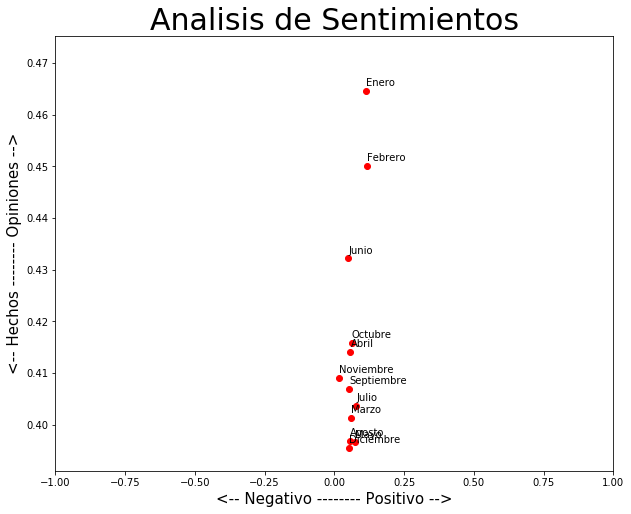

In [165]:
# Grafico de sentimiento 
plt.rcParams['figure.figsize'] = [10, 8]

for index, mes in enumerate(datos_sentimientos.index):
    x = datos_sentimientos.polarity.loc[mes]
    y = datos_sentimientos.subjectivity.loc[mes]
    plt.scatter(x, y, color='red')
    plt.text(x+.001, y+.001, datos_sentimientos['Name'][index], fontsize=10)
    plt.xlim(-1.0, 1.0) 
    
plt.title('Analisis de Sentimientos', fontsize=30)
plt.xlabel('<-- Negativo -------- Positivo -->', fontsize=15)
plt.ylabel('<-- Hechos -------- Opiniones -->', fontsize=15)

plt.show()